<a href="https://colab.research.google.com/github/NantoCaparachin/Analisis_Descriptivos/blob/main/email_Eu_core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [223]:
##overlap = [name for name in mcolors.CSS4_COLORS if f'xkcd:{name}' in mcolors.XKCD_COLORS]
##overlap ### para tener una lista de colores 

1. Cargar los datos en un grafo networkx

In [224]:
import pandas as pd 
import numpy as np 
import networkx as nx
import os
import matplotlib.pyplot as plt
import plotly.express as px
from  community import community_louvain

import warnings
warnings.filterwarnings('ignore')

In [225]:
target_path = open("email-Eu-core.txt")
g = nx.read_edgelist(target_path, 
                     nodetype=int)

2. ¿Cuántas cuentas de correo y conexiones están representadas en el gráfico?

In [226]:
print(len(g.nodes))
print(len(g.edges))

1005
16706


In [227]:
comunidades = community_louvain.best_partition(g)

3. Calcular la modularidad de este grafo con el método de Louvain, ¿cuántas grupo según su modularidad hay?

In [228]:
print(f"La modularidad es de: {community_louvain.modularity(comunidades, g):.2f}"  )
print(f"La cantidad de comunidades es: {len(set(comunidades.values())):,}")

La modularidad es de: 0.43
La cantidad de comunidades es: 27


4. Calcular el Page Rank de este grafo, ¿cuáles son las cuentas más importantes según su PageRank?

In [229]:
pagerank = nx.pagerank(g)
print(pagerank)

{0: 0.0012241295199045864, 1: 0.0014259510042902283, 2: 0.00260463482818408, 3: 0.0018332174392173863, 4: 0.0025264401879905776, 5: 0.004914163734511238, 6: 0.003145906944197701, 7: 0.0020020944919277666, 8: 0.0010592986261601348, 9: 0.001202557796628001, 10: 0.0013026316608832494, 11: 0.002064338143998903, 12: 0.001715064328163427, 13: 0.004589938693459019, 14: 0.0021662685314650394, 15: 0.0014574672416746283, 16: 0.00186960786301669, 17: 0.0027676670389268194, 18: 0.0015312949343487745, 19: 0.0018905950987648935, 20: 0.0020319570887596845, 21: 0.0036625451132120458, 22: 0.0004991589881118159, 23: 0.002035800977072181, 24: 0.0012121974705968101, 25: 0.0009039206582156919, 26: 0.0009491583327602047, 27: 0.00171251934688377, 28: 0.002587629010465832, 29: 0.001492448569633864, 30: 0.0017208445060822985, 31: 0.0012547965824590683, 32: 0.0009272290903036942, 33: 0.0008380148350899164, 34: 0.000839373575533886, 35: 0.0015023415677683873, 36: 0.0011462913715729558, 37: 0.0010196418506762664,

In [230]:
import operator

pagerank_ordenado = sorted(pagerank.items(), key=operator.itemgetter(1), reverse=True)
print(pagerank_ordenado[:5])

[(160, 0.009070948495026508), (121, 0.006068785425631803), (82, 0.0060307053368408095), (107, 0.005838096043249359), (86, 0.005721519612322318)]


5. Hallar algunas métricas de centralidad

- Degree Centrality

In [231]:
degress = dict(g.degree())

In [232]:
ranks = [(k,v) for k,v in sorted(degress.items(),key=lambda item:-item[1])]
ranks[:5]

[(160, 347), (121, 234), (82, 233), (107, 221), (86, 218)]

- Closeness centrality

In [233]:
closeness = nx.closeness_centrality(g)

In [234]:
ranks = [(k,v) for k,v in sorted(closeness.items(), key=lambda item:-item[1])]
ranks[:5]

[(160, 0.5738477207559312),
 (82, 0.5341954459662731),
 (121, 0.5312586925524948),
 (107, 0.5237721201913215),
 (62, 0.5226390274488848)]

- Betweenness Centrality

In [235]:
betweenness = nx.betweenness_centrality(g)

In [236]:
ranks = [(k,v) for k,v in sorted(betweenness.items(), key=lambda item:-item[1])]
ranks[:5]

[(160, 0.08741473493638795),
 (86, 0.03778853269115196),
 (5, 0.030994686545277747),
 (82, 0.027880741135114222),
 (121, 0.027841538825800698)]

- Pagerank Centrality

In [237]:
pagerank = nx.pagerank(g)

In [238]:
ranks = [(k,v) for k,v in sorted(pagerank.items(), key=lambda item:-item[1])]
ranks[:5]

[(160, 0.009070948495026508),
 (121, 0.006068785425631803),
 (82, 0.0060307053368408095),
 (107, 0.005838096043249359),
 (86, 0.005721519612322318)]

6. Graficar las redes

{0: 0, 1: 0, 2: 12, 3: 12, 4: 12, 5: 12, 6: 12, 7: 2, 8: 2, 9: 2, 10: 3, 11: 2, 12: 2, 13: 4, 14: 8, 15: 10, 16: 3, 17: 0, 18: 0, 19: 2, 20: 3, 21: 3, 22: 3, 23: 4, 24: 4, 25: 4, 26: 4, 27: 4, 28: 4, 29: 4, 30: 4, 31: 4, 32: 4, 33: 4, 34: 4, 35: 4, 36: 4, 37: 4, 38: 4, 39: 4, 40: 4, 41: 8, 42: 3, 43: 2, 44: 2, 45: 10, 46: 10, 47: 4, 48: 4, 49: 3, 50: 3, 51: 8, 52: 13, 53: 13, 54: 12, 55: 12, 56: 12, 57: 12, 58: 12, 59: 12, 60: 13, 61: 13, 62: 3, 63: 12, 64: 8, 65: 8, 66: 3, 67: 3, 68: 3, 69: 3, 70: 3, 71: 3, 72: 3, 73: 0, 74: 0, 75: 4, 76: 4, 77: 3, 78: 3, 79: 3, 80: 3, 81: 3, 82: 3, 83: 3, 84: 3, 85: 0, 86: 3, 87: 3, 88: 12, 89: 12, 90: 3, 91: 3, 92: 3, 93: 4, 94: 8, 95: 8, 96: 4, 97: 10, 98: 10, 99: 10, 100: 10, 101: 10, 102: 12, 103: 13, 104: 13, 105: 3, 106: 3, 107: 3, 108: 3, 109: 3, 110: 3, 111: 3, 112: 3, 113: 4, 114: 4, 115: 4, 116: 4, 117: 3, 118: 3, 119: 4, 120: 0, 121: 3, 122: 13, 123: 4, 124: 10, 125: 10, 126: 12, 127: 3, 128: 8, 129: 8, 130: 8, 131: 12, 132: 12, 133: 4, 13

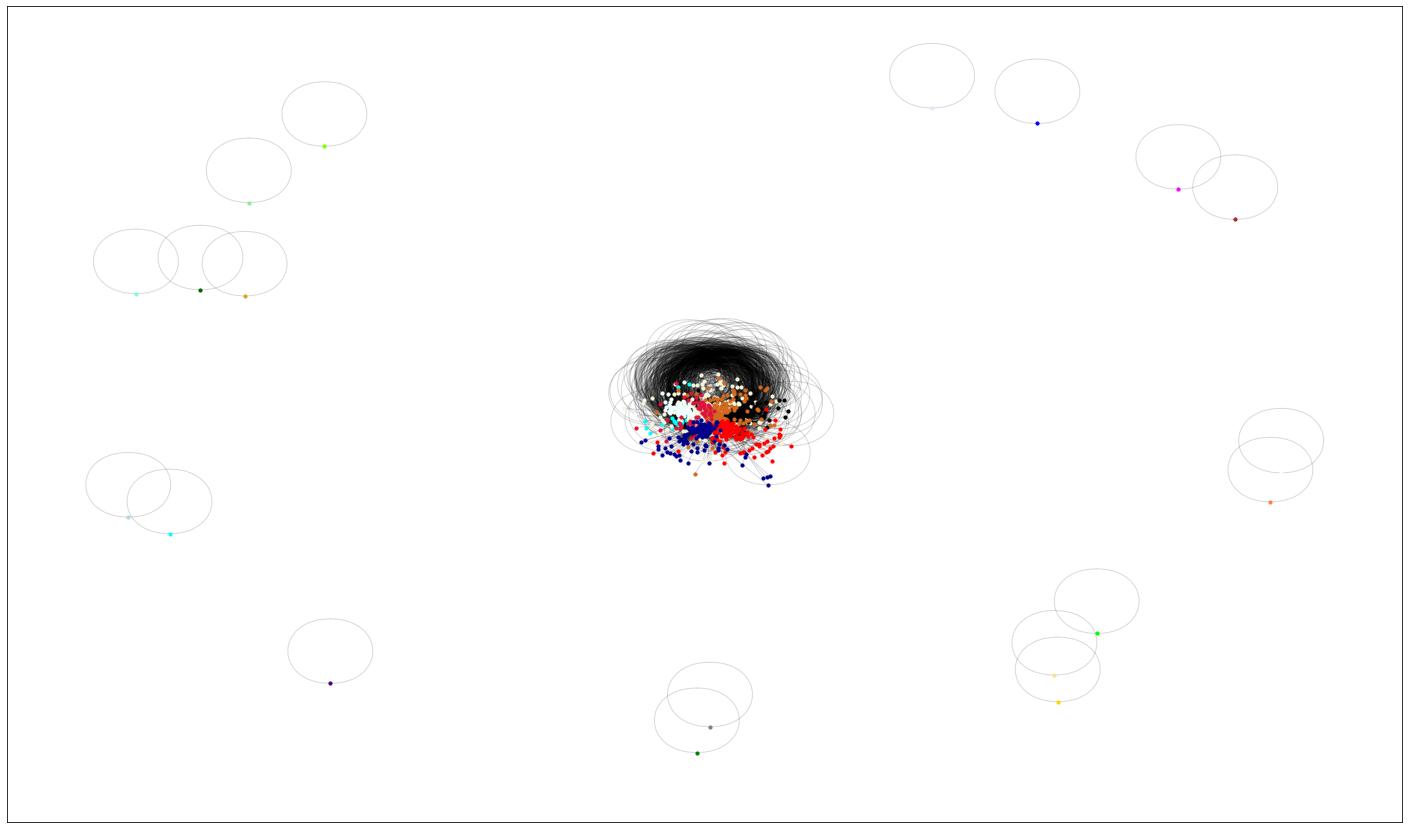

In [239]:
print(comunidades)

plt.figure(figsize=(25,15))

color = ['aqua',  'aquamarine',  'azure',  'beige',  'black',  'blue',  'brown',  'chartreuse',  'chocolate',  'coral',  'crimson',  'cyan',  "red",
         'darkblue',  'darkgreen',  'fuchsia',  'gold',  'goldenrod',  'green',  'grey',  'indigo',  'ivory', 'khaki',  'lavender',  'lightblue',  'lightgreen',  'lime']

pos = nx.spring_layout(g)

i = 0
for com in set(comunidades.values()):
  list_nodes = [nodo for nodo in comunidades if comunidades[nodo]==com]
  nx.draw_networkx_nodes(g, pos, list_nodes, node_size=10, node_color=color[i])
  i += 1
nx.draw_networkx_edges(g,pos,alpha=0.15)
plt.show()


7. Determinar los nodos de cada comunidad

In [240]:
print(comunidades)
communities = {c:[] for c in set(comunidades.values())}
print(communities)
#recorrer las comunidades para agregar cada aeropuerto a su id respectivo
for k in comunidades:
  communities[comunidades[k]].append(k)
for c in communities:
  print(c, len(communities[c]))

{0: 0, 1: 0, 2: 12, 3: 12, 4: 12, 5: 12, 6: 12, 7: 2, 8: 2, 9: 2, 10: 3, 11: 2, 12: 2, 13: 4, 14: 8, 15: 10, 16: 3, 17: 0, 18: 0, 19: 2, 20: 3, 21: 3, 22: 3, 23: 4, 24: 4, 25: 4, 26: 4, 27: 4, 28: 4, 29: 4, 30: 4, 31: 4, 32: 4, 33: 4, 34: 4, 35: 4, 36: 4, 37: 4, 38: 4, 39: 4, 40: 4, 41: 8, 42: 3, 43: 2, 44: 2, 45: 10, 46: 10, 47: 4, 48: 4, 49: 3, 50: 3, 51: 8, 52: 13, 53: 13, 54: 12, 55: 12, 56: 12, 57: 12, 58: 12, 59: 12, 60: 13, 61: 13, 62: 3, 63: 12, 64: 8, 65: 8, 66: 3, 67: 3, 68: 3, 69: 3, 70: 3, 71: 3, 72: 3, 73: 0, 74: 0, 75: 4, 76: 4, 77: 3, 78: 3, 79: 3, 80: 3, 81: 3, 82: 3, 83: 3, 84: 3, 85: 0, 86: 3, 87: 3, 88: 12, 89: 12, 90: 3, 91: 3, 92: 3, 93: 4, 94: 8, 95: 8, 96: 4, 97: 10, 98: 10, 99: 10, 100: 10, 101: 10, 102: 12, 103: 13, 104: 13, 105: 3, 106: 3, 107: 3, 108: 3, 109: 3, 110: 3, 111: 3, 112: 3, 113: 4, 114: 4, 115: 4, 116: 4, 117: 3, 118: 3, 119: 4, 120: 0, 121: 3, 122: 13, 123: 4, 124: 10, 125: 10, 126: 12, 127: 3, 128: 8, 129: 8, 130: 8, 131: 12, 132: 12, 133: 4, 13

8. Calcular la modularidad

In [241]:
for com in communities:
  sg = nx.subgraph(g, communities[com])
  p = community_louvain.best_partition(sg)
  print(f"La comunidad {com}", f"tiene una modularidad de: {community_louvain.modularity(p,sg):f}" , f"y sus nodos son:{[g[a] for a in communities[com]]}")

La comunidad 0 tiene una modularidad de: 0.216074 y sus nodos son:[AtlasView({1: {}, 17: {}, 316: {}, 146: {}, 581: {}, 268: {}, 221: {}, 218: {}, 18: {}, 734: {}, 178: {}, 380: {}, 0: {}, 459: {}, 215: {}, 250: {}, 148: {}, 73: {}, 74: {}, 248: {}, 498: {}, 226: {}, 101: {}, 377: {}, 177: {}, 103: {}, 560: {}, 309: {}, 88: {}, 5: {}, 297: {}, 313: {}, 223: {}, 238: {}, 368: {}, 266: {}, 222: {}, 283: {}, 6: {}, 64: {}, 65: {}, 166: {}, 120: {}}), AtlasView({0: {}, 74: {}, 17: {}, 316: {}, 1: {}, 268: {}, 495: {}, 377: {}, 549: {}, 310: {}, 218: {}, 215: {}, 147: {}, 106: {}, 21: {}, 225: {}, 82: {}, 254: {}, 155: {}, 146: {}, 85: {}, 284: {}, 189: {}, 250: {}, 726: {}, 548: {}, 224: {}, 568: {}, 221: {}, 52: {}, 255: {}, 187: {}, 127: {}, 199: {}, 121: {}, 84: {}, 537: {}, 351: {}, 222: {}, 128: {}, 616: {}, 280: {}, 450: {}, 232: {}, 459: {}, 641: {}, 979: {}, 368: {}, 317: {}, 142: {}, 560: {}}), AtlasView({18: {}, 120: {}, 74: {}, 218: {}, 307: {}, 308: {}, 1: {}, 177: {}, 309: {},

In [242]:
#Obtienes un diccioanrio de datos
comunidad_3 = dict(filter(lambda x: x[1] == 3, comunidades.items())) ##diccionario
len(comunidad_3)

272

9. Graficar la modularidad del subgrafo 3

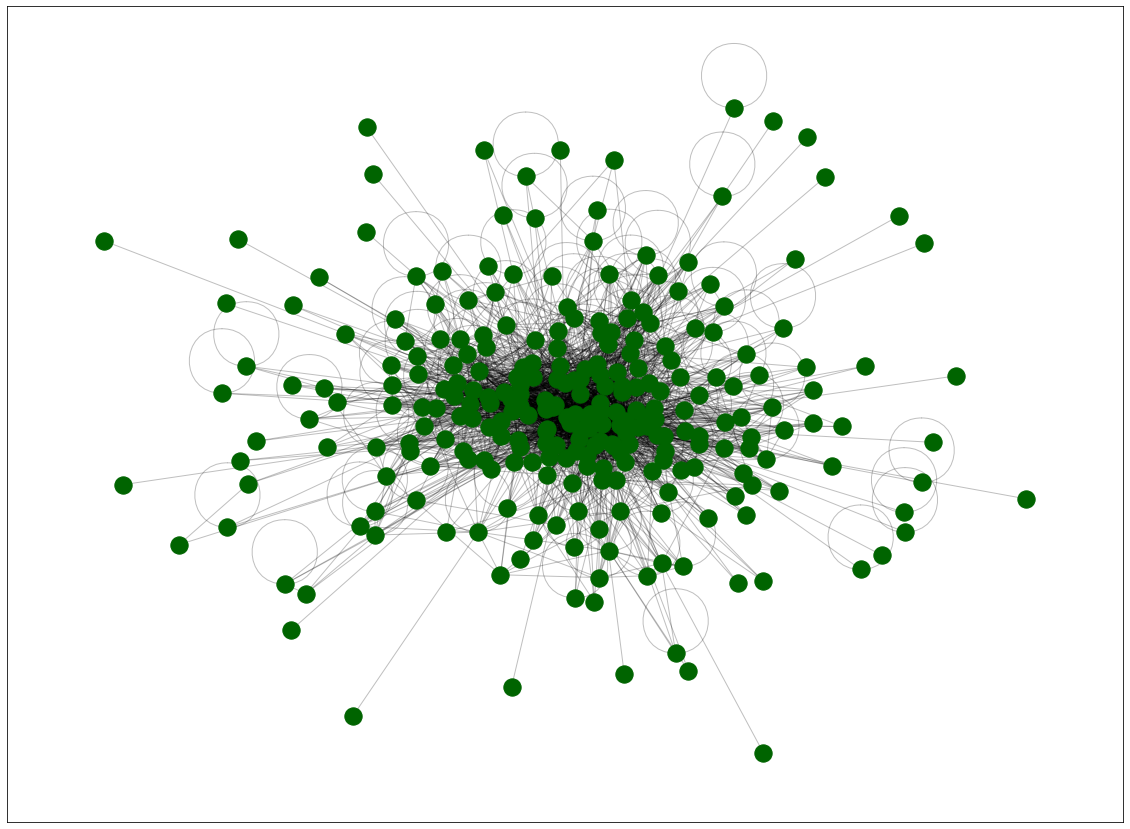

In [243]:
plt.figure(figsize=(20,15))
sg = nx.subgraph(g, communities[3]) ##El valor de comunities se ha obtenido de una función anterior
pos=nx.spring_layout(sg)
nx.draw_networkx_nodes(sg,pos=pos, node_color="darkgreen")
nx.draw_networkx_edges(sg,pos=pos,alpha=0.25)

plt.show()

10. Diametro de la comunidad 3

In [248]:
print("El diametro de la red es:", nx.diameter(sg))

El diametro de la red es: 5
